In [16]:

## Census data ##


#imports
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# workclass, education, relationship, sex

# Define the headers since the data does not have any
headers = ["age", "workclass", "fnlwgt", "education", "education-num", "marital status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
headers2 = ["age", "workclass", "education", "education-num", "marital status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# Read in the CSV file and convert "?" to NaN
#df = pd.read_csv('/content/sample_data/census_data.txt', header=None, names=headers, na_values="?" )
df = pd.read_csv('/content/sample_data/adjusted_data.csv', header=0, names=headers2, na_values="?" )

print("Shape of dataframe ",df.shape)
df = df[~(df == " ?").any(axis=1)]
#df = df[~(df2 == " ?").any(axis=1)]
print("Shape of the dataframe after getting rid of ? " , df.shape)

# drop fnlwgt
#df = df.drop("fnlwgt",axis = 1)
#Change this to drop it from dataframe and to make it the label
label_name = "education"                                                                # EDIT LABEL HERE
label_df = df[label_name].copy()
df = df.drop([label_name],axis= 1)

dummy_labels = pd.get_dummies(label_df.copy())
unique_df = dummy_labels.columns.values
dummy_labels = dummy_labels.to_numpy()

lb_label = LabelEncoder()
label_df["label_code"] = lb_label.fit_transform(label_df)


print("shape of dataframe after dropping label ",df.shape)
print("shape of the labels ",label_df.shape)

#print(df.dtypes)
int_df = df.select_dtypes(include =["int64"]).copy()
obj_df = df.select_dtypes(include=['object']).copy()
#print(obj_df.shape)
#print(int_df.shape)
new_obj_df = pd.get_dummies(obj_df)
#print(new_obj_df)

print("this is the shape of the continuous data ", int_df.shape)
print("This is the shape of the object data ", obj_df.shape)

frames = [int_df, new_obj_df]
result = pd.concat(frames, axis= 1)
print("shape of dataframe adding the extra columns with get dummies ", result.shape)
#print(result)
#occupation

data = result.to_numpy()
int_data = int_df.to_numpy()
encoded_labels = label_df["label_code"]

print("shape after converting dataframe to np ",data.shape)
print("shape of encoded labels ", encoded_labels.shape)
#print(labels.shape)


scaler_X = StandardScaler()
data = scaler_X.fit_transform(data)
print("shape of data after being scaled ", data.shape)

Shape of dataframe  (32517, 14)
Shape of the dataframe after getting rid of ?  (32517, 14)
shape of dataframe after dropping label  (32517, 13)
shape of the labels  (32518,)
this is the shape of the continuous data  (32517, 5)
This is the shape of the object data  (32517, 8)
shape of dataframe adding the extra columns with get dummies  (32517, 100)
shape after converting dataframe to np  (32517, 100)
shape of encoded labels  (32517,)
shape of data after being scaled  (32517, 100)


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [17]:
######## DECISION TREE + RANDOM FOREST STUFF #########
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# General overview of variance (calculated in PCA)
#cont_data = cont_data - np.mean(cont_data, axis=0)

#Accuracy Lists                          
decisiontree_list = []
randomforest_list = []
svm_list = []
linear_list=[]
ridge_list = []
lasso_list = []


x_vals = [1, 2, 4, 8, 10, 15, 20, 25, 30]                                   #--------- choose PCA of 8 for hypertuning/final plots
for i in x_vals:
  pca_overall = PCA(n_components = i)
  pca_data = pca_overall.fit_transform(data)

  extracted_data = pca_data
  extracted_labels = encoded_labels

  X_train, X_test, y_train, y_test = train_test_split(extracted_data, extracted_labels, test_size=0.3,random_state=109) # 70% training and 30% test

  print("shape of the pca data ",pca_data.shape)
  classifier = DecisionTreeClassifier(max_depth=10, min_sample_split=0.0001)                                 ## Pooja's Hypertuned Parameters: max_depth = 10, min_sample_splits=0.0001
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  decisiontree_list.append(classifier.score(X_test, y_test) * 100)


  clf = RandomForestClassifier(n_estimators = 100, max_depth=10, n_jobs = -1)                                  ## Aakash's Hypertuned Parameters: n_estimators = 100, max_depth=10
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  randomforest_list.append(clf.score(X_test, y_test) * 100)

  svm_model_linear = SVC(kernel = 'poly', C = 1, gamma = 0.054).fit(X_train, y_train)                         ## Josh's Hypertuned Parameters: C = 1, gamma = 0.054
  svm_predictions = svm_model_linear.predict(X_test) 
  y_pred = svm_predictions
  svm_list.append(svm_model_linear.score(X_test, y_test) * 100)
  print("This is the accuracy of the classifier: ", svm_model_linear.score(X_test, y_test))

for j in x_vals:
  pca_overall = PCA(n_components = j)
  pca_data = pca_overall.fit_transform(data)

  extracted_data = pca_data
  #poly = PolynomialFeatures(degree=4)
  extracted_data = poly.fit_transform(extracted_data)
  X_train, X_test, y_train, y_test = train_test_split(extracted_data, dummy_labels, test_size=0.3,random_state=109)
  ridge_dummy = np.ones((X_test.shape[0], unique_df.shape[0]))
  lasso_dummy = np.ones((X_test.shape[0], unique_df.shape[0]))
  linear_dummy = np.ones((X_test.shape[0], unique_df.shape[0]))
  for i in range(unique_df.shape[0]):
    y_train_i = y_train[:,i]
    linear = LinearRegression()
    linear.fit(X_train, y_train_i)
    linear_dummy[:,i] = linear.predict(X_test)


    ridge = Ridge(alpha=0.1,max_iter=2000)
    ridge.fit(X_train, y_train_i)
    ridge_dummy[:,i] = ridge.predict(X_test)

    lasso = Lasso(alpha=0.1,max_iter=2000)
    lasso.fit(X_train, y_train_i)
    lasso_dummy[:,i] = lasso.predict(X_test)
  linear_dummy = np.argmax(linear_dummy, axis=1)
  ridge_dummy = np.argmax(ridge_dummy, axis=1)
  lasso_dummy = np.argmax(lasso_dummy, axis=1)
  y_test_max = np.argmax(y_test, axis=1)
  linear_list.append(accuracy_score(linear_dummy, y_test_max)*100)
  ridge_list.append(accuracy_score(ridge_dummy, y_test_max)*100)
  lasso_list.append(accuracy_score(lasso_dummy, y_test_max)*100)

print(linear_list)
print(randomforest_list)
# print(svm_list)
# print(decisiontree_list)


shape of the pca data  (32517, 1)


TypeError: ignored

In [0]:
                                                                                  # you will need to comment out the other classifiers so your y_pred is from the one of interest

                                                                                  # if you have small numebr of labels - you can turn on the numbers within the boxes.
                                                                                  # check naming of things and ensure you only run PCA @ 8 with your tuned parameters!
                                                                                  
                                                                                  # Select the labels in the dictionary below

# Plot non-normalized confusion matrix
string_dict = {0: ('Private','Self-emp-not-inc','Self-emp-inc','Federal-gov','Local-gov','State-gov','Without-pay', 'Never-worked', 'Private'),
                1: ('10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college'),
                2: ('Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'),
                3: ('?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'),
               4:('Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife'),
               5: ('White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'),
              6: ('Female', 'Male'),
              7:('Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia')
              }

class_names = sorted(string_dict[2])                                                     # Choose Correct labels that correpond with variable you are lookign at

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=60, ha="right",                      # you can edit the angle on the x axis if things are too far apart
             rotation_mode="anchor")

    # # Loop over data dimensions and create text annotations.                   # UNCOMMENT IF YOU WANT NUMBERS
    # fmt = '.2f' if normalize else 'd'                                           # UNCOMMENT IF YOU WANT NUMBERS
    # thresh = cm.max() / 2.                                                      # UNCOMMENT IF YOU WANT NUMBERS
    # for i in range(cm.shape[0]):                                                # UNCOMMENT IF YOU WANT NUMBERS
    #     for j in range(cm.shape[1]):                                            # UNCOMMENT IF YOU WANT NUMBERS
    #         ax.text(j, i, format(cm[i, j], fmt),
    #                 ha="center", va="center",
    #                 color="white" if cm[i, j] > thresh else "black")
    # fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

NameError: ignored

ValueError: ignored

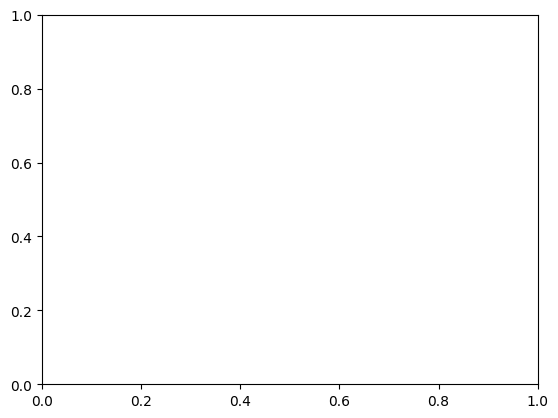

In [0]:

#OpenSSL Timing Graph
#colors to use, if needed

plt.style.use('default')
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),                        
                (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),                      
                (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),                    
                (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]                      

'''
#####################################################################################################
# In: x_var  y_multiVar  y_varLegends ImgOutName  Title Ylabel
# Out: Image with bargraph comparison
# The function takes in "x variables (x_var)" and multiple y_var to be stacked 
# and outputs an image with name ImgoutName, title Title, and ylabel Ylabel
##################################################################################################### 
'''
class Line:
    id=None
    x_val_arr=None
    y_val_arr=None
    legend=None

class plot:
    pca=None
    decisiontree=None
    randomforest=None
    svm=None
    linear=None

def drawLines(Lines, ImgOutName, XLabel, YLabel, Title):

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.                 
    for i in range(len(tableau20)):
        r, g, b = tableau20[i]
        tableau20[i] = (r / 255., g / 255., b / 255.) 
        
    #different hatches
    patterns = ('.', '+', 'x', '*', 'o', 'O', '.', '\\')
    colors = ['red', 'blue', 'green',  'orange', 'black', 'fuchsia', 'gold', 'peru']
    NumPatterns = len(patterns)
    numLines = len(Lines)
    plt.gca().set_prop_cycle(color=colors, marker=patterns)

    i = 0
    linestyles = ['-', '--', '-.', ':']
    for line in Lines:
        linestyle = linestyles[i]
        plt.plot(line.x_val_arr, line.y_val_arr, label=line.legend,
                 linestyle=linestyle, linewidth=3)
        i += 1

    #plt.legend(loc='upper left', fontsize=28)
    #plt.legend(loc='upper center', fontsize=28)
    plt.legend(loc='best', fontsize=12)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.ylabel(YLabel, labelpad=6, fontsize=24)
    plt.xlabel(XLabel, labelpad=6, fontsize=24)
    plt.title(Title, fontsize=28)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

actual_time=['Decision Tree', "Random Forest", "SVM", "Linear Regression"]
i = 0
plots = []	
#print " printing in hashs"
for benchmark in actual_time:
    p = plot()
    p.loopid = benchmark
#print p.loopid
    p.nbna = Line()
    p.nbna.id = benchmark
    p.nbna.x_val_arr = x_vals
    p.nbna.y_val_arr = decisiontree_list
    p.nbna.legend = "Decision Tree"
#print p.actual_line.y_val_arr

    p.bna = Line()
    p.bna.id = benchmark
    p.bna.x_val_arr = x_vals
    p.bna.y_val_arr = randomforest_list
    p.bna.legend = "Random Forest"

    p.bfr = Line()
    p.bfr.id = benchmark
    p.bfr.x_val_arr = x_vals
    p.bfr.y_val_arr = svm_list
    p.bfr.legend = "SVM"

    p.bff = Line()
    p.bff.id = benchmark
    p.bff.x_val_arr = x_vals
    p.bff.y_val_arr = linear_list
    p.bff.legend = "Linear Regressionh"

#print p.predicted_line.y_val_arr
    plots.append(p)

for p in plots:
    Title = ""
    drawLines([p.nbna, p.bna, p.bfr, p.bff],"",
               "Number of Processes","Accuracy",Title)	
    # drawLines([p.nbna, p.nbfr, p.nbpp, p.npff, p.bna, p.bfr, p.bff, p.bpp],"",
    #           "Number of Processes","Time(s)",Title)	


# Accuracy

### Occupation
PCA w n = 1 => 21.81% <br/> 
PCA w n = 2 => 27.2% <br />
PCA w n = 3 => 27.53% <br />
PCA w n = 4 => 29.06% <br />
PCA w n = 5 => 29.5 % <br />
PCA w n = 10 => 32.28% <br />
PCA w n = 20 => 32.998% <br />
PCA w n = 30 => 33.29% <br />
PCA w n = 40 => 33.29% <br />

### Workclass
PCA w n = 10 => 73.96% <br />
PCA w n = 20 => 74.3% <br />
PCA w n = 30 => 74.3% <br />

### Education
PCA w n = 5 => 43.56% <br />
PCA w n = 10 -> 47.3% <br />
PCA w n = 20 => 48.82% <br />
PCA w n = 30 => 47.93% <br />

### Marital Status 
PCA w n = 5 => 67.48% <br />
PCA w n = 10 => 77.85% <br />
PCA w n = 20 => 79.33% <br />
PCA w n = 30 => 80.26% <br />

### Relationship
PCA w n = 5 => 66.47 <br />
PCA w n = 10 => 70.86 <br />
PCA w n = 20 => 73.63 <br />
PCA w n = 30 => 74% <br />


### Race 
PCA w n = 5 => 86.27% <br />
PCA w n= 10 => 86.98% <br />
PCA w n = 20 => 87.89% <br />
PCA w n = 30 => 87.79% <br />

### Sex
PCA w n = 5 => 76.73 <br />
PCA w n = 10 => 82.15% <br />
PCA w n = 20 => 84. 31% <br />
PCA w n = 30 => 84.48% <br />

### Native Country

PCA w n = 5 => 91.54% <br />
Probably labeling most as American Citizens which is why it is so high <br />

### Income
PCA w n = 5 => 81% <br />
PCA w n = 10 => 83.47% <br />